In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("weatherHistory.csv")
df.head()

Saving weatherHistory.csv to weatherHistory (2).csv


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
print(df.dtypes)
print(df.shape)
print(df.isna().sum())
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

Formatted Date               object
Summary                       int64
Precip Type                   int64
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object
(95936, 12)
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [ ]:
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
label_encoder = preprocessing.LabelEncoder()  
label_encoder.fit(df['Summary']) 
df['Summary'] = label_encoder.transform(df['Summary']) 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Precip Type']) 
df['Precip Type'] = label_encoder.transform(df['Precip Type']) 
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


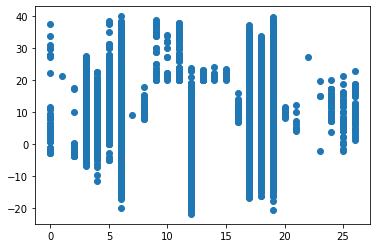

In [ ]:
x = np.array(df['Summary']).reshape(-1, 1)
y = np.array(df['Temperature (C)'])
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [ ]:
x = df[['Summary']].values
y = df['Temperature (C)'].values
slr = LinearRegression()
slr.fit(x, y)
y_pred = slr.predict(x)
print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [0.32040115]
Intercept: 6.810085434021573


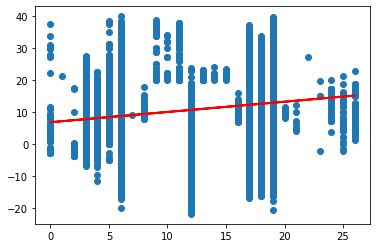

In [ ]:
plt.scatter(x, y)
plt.plot(x, slr.predict(x), color='red', linewidth=2)
plt.show()

In [ ]:
print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 89.649


Восстановленное линейное уравнение регрессии:

y = 6.81 + 0.32*x



MSE: 91.590 - Wind Speed

MSE: 91.594 - Pressure (millibars)



Исходя из значений MSE признак Summary оказался наиболее значимым, 
